<a href="https://colab.research.google.com/github/fabarroso/MVP1/blob/main/MVP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##          **MVP1 - Acidentes Ferroviários**

Nome: Fabio de Andrade Barroso

Matricula:4052025000158

Dataset original:

https://dados.antt.gov.br/dataset/relatorio-de-acompanhamento-de-acidentes-ferroviarios-raaf/resource/3a191a68-837b-4359-bb69-93f9b8e49ff1

Acidentes ferroviários podem causar não apenas prejuízos materiais significativos, mas também colocar em risco a vida de passageiros,
trabalhadores e comunidades próximas às linhas férreas.

A análise de dados nos permite identificar padrões, causas frequentes e fatores de risco associados, possibilitando assim a implementação de medidas preventivas e a melhoria das políticas de segurança.



**Descrição do problema**


O problema consiste em analisar e explorar os dados de acidentes ferroviários no Brasil entre dezembro de 2020 e dezembro de 2024.
O dataset contém informações como data, tipo de acidente, causa presumida, região, linha, entre outros. O objetivo é identificar padrões, causas frequentes por meio da análise de variáveis envolvidas em cada ocorrência.

**Hipóteses levantadas**


*   Existe relação entre tipo de linha e gravidade do acidente?
*   Acidentes com cargas perigosas tendem a ter mais vítimas?
*   Estados ou concessionárias específicas apresentam mais casos?
*   Existe sazonalidade (mês ou hora) na ocorrência dos acidentes?
*   Existe uma estação do ano com maior número de acidentes?
*   Certos tipos de acidentes estão mais associados à fatalidades?

**Tipo de Problema**

Este é um problema de classificação, pois, a maior parte das variáveis são categóricas, tendo como os exemplos: tipo de acidente, existencia de vitimas, gravidade; permtindo assim aplicar modelos para prever classes e tomar decisões com base em categorias.

**Importação das Bibliotecas Necessárias e Carga de Dados**

****
As bibliotecas escolhidas e carregadas no código foram fundamentais para realizar uma análise exploratória de dados (EDA), tornando a leitura mais eficiente, possibilitando a manipulação e limpeza, permitindo análises estatisticas e visualizações claras e informativas.

Foi utilizado pd.set_option do Pandas, evitando assim que colunas ou textos ficassem truncados, tornando a EDA mais fácil de ser compreendida.

O dataset foi carregado diretamente de uma URL no GitHub, utilizando pd.read_csv, com a configuração de delimitador para ponto e vírgula (;) e codificação adequada para caracteres especiais (ISO-8859-1).
****

In [405]:
## Carga de bibliotecas utilizadas
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 3000)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

In [406]:
##Carregamento dos Dados
# URL GitHub
url = 'https://raw.githubusercontent.com/fabarroso/acidentes-ferroviarios/main/Acidentes_Ferroviarios.csv'

# Carregamento do dataset
df = pd.read_csv(url, delimiter=';', encoding='ISO-8859-1')

# Exibe as primeiras linhas
print(df.head().to_string())

  Gravidade Concessionaria Data_Ocorrencia Hora_Ocorrencia  UF                Municipio                       Linha  Quilômetro_Inicial  Quilômetro_Final    Estação_Anterior Estação_Posterior    Perímetro_Urbano                       Causa_direta Causa_contibutiva         Natureza  Interrupção  N_Trem  Prefixo Double_Stack Serviço_Transporte  N_feridos  N_obitos                                                                                      Mercadoria                                                   Equipagem Outra_Ferrovia   PN Prejuízo_Financeiro
0       Sim            FTL      12/01/2020           16:00  PE  Jaboatao dos Guararapes           Tronco Sul Recife               5.000             5.001          Jorge Lins   Entroncamento 1                 Não  Casos Fortuitos ou de Força Maior     Animal na via          Colisão          0.0       0      NaN          NaN                NaN          0         0                                                                           

**Análise e Tratamento de Dados**

****

O dataset contém 2.973 entradas e 27 colunas, abrangendo diversas informações sobre os acidentes ferroviários no Brasil. As colunas variam desde atributos categóricos, como gravidade, concessionária e causa direta, até variáveis numéricas, como quilômetro inicial e quilômetro final, que indicam a localização dos acidentes.

Através do uso do método df.info(), obtivemos informações sobre os tipos de dados e a quantidade de valores não nulos em cada coluna. A maioria das colunas é categórica, representando características como a gravidade do acidente, a concessionária envolvida e as estações ferroviárias. Além disso, variáveis numéricas como os quilômetros de ocorrência do acidente foram identificadas, permitindo uma análise mais detalhada sobre a distribuição geográfica dos incidentes.

O gráfico de barras gerado a partir de df.dtypes.value_counts() visualiza a distribuição dos tipos de dados, oferecendo uma visão clara sobre quantas colunas são categóricas, numéricas e de outros tipos.

Para entender melhor a distribuição das variáveis numéricas, como quilometro_inicial e quilometro_final, foram gerados histogramas. Estes gráficos ajudam a visualizar como os dados estão distribuídos dentro de intervalos de valores específicos e identificar possíveis outliers ou padrões de concentração.


****

Total de linhas: 2973
Total de colunas: 27

--------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gravidade            2973 non-null   object 
 1   Concessionaria       2973 non-null   object 
 2   Data_Ocorrencia      2973 non-null   object 
 3   Hora_Ocorrencia      2973 non-null   object 
 4   UF                   2973 non-null   object 
 5   Municipio            2973 non-null   object 
 6   Linha                2973 non-null   object 
 7   Quilômetro_Inicial   2973 non-null   float64
 8   Quilômetro_Final     2927 non-null   float64
 9   Estação_Anterior     2973 non-null   object 
 10  Estação_Posterior    2973 non-null   object 
 11  Perímetro_Urbano     2973 non-null   object 
 12  Causa_direta         2973 non-null   object 
 13  Causa_contibutiva    2906 non-null   objec

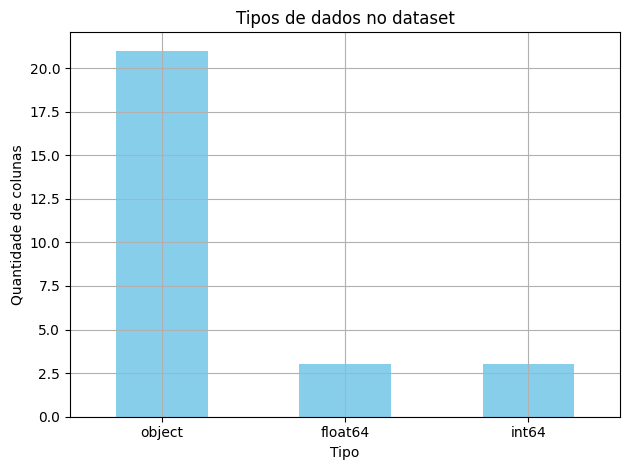


------------------------------------------------------------------------------------------------------------------------------------------------------



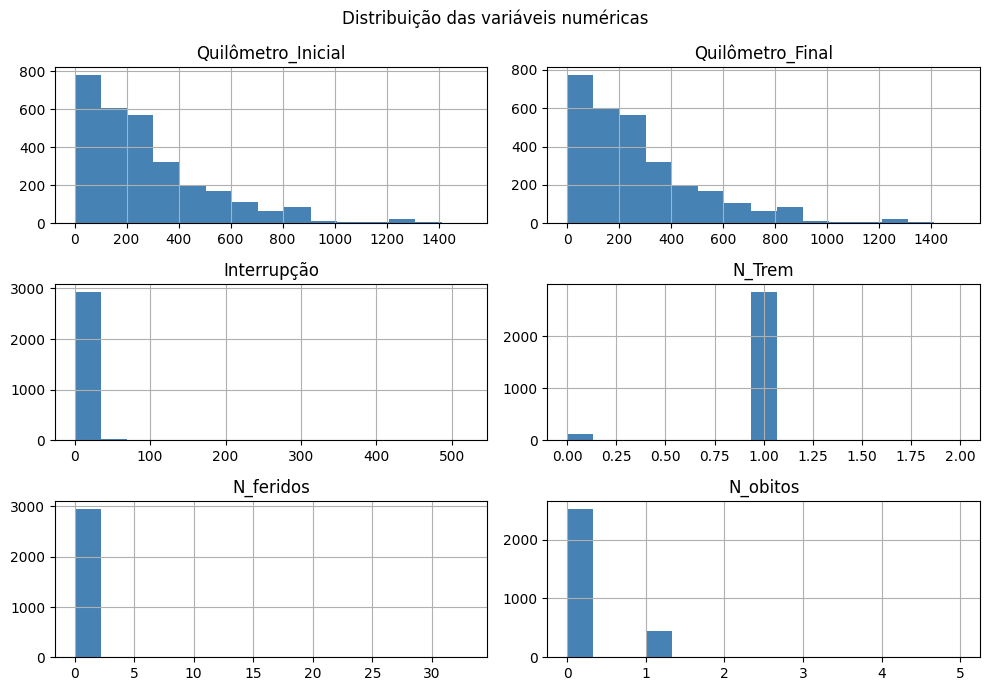

In [407]:
# Dimensão do dataset
print(f"Total de linhas: {df.shape[0]}")
print(f"Total de colunas: {df.shape[1]}")

print("\n" + "-"*50 + "\n")

# Informações dos tipos de dados
df.info()

print("\n" + "-"*90 + "\n")

# Gráfico de barras com o tipo de dado por coluna
type_counts = df.dtypes.value_counts()

type_counts.plot(kind='bar', color='skyblue')
plt.title('Tipos de dados no dataset')
plt.xlabel('Tipo')
plt.ylabel('Quantidade de colunas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(True)
plt.show()

print("\n" + "-"*150 + "\n")

# Histograma de variáveis numéricas
df.select_dtypes(include=['int64', 'float64']).hist(bins=15,
                 figsize=(10, 7), color='steelblue')
plt.suptitle('Distribuição das variáveis numéricas')
plt.tight_layout()
plt.show()

****

Foi realizada uma padronização inicial dos nomes das colunas a fim de remover os espaços em branco, converter todos os nomes para minusculos, substituir os espaços por unerline '_', também remover acentuações e caracter especial; resultando assim em um dataset com nomes de colunas padronizadas.

Nesse dataset há registros repetidos.

A coluna data_ocorrencia foi analisada e convertida para datetime para garantir que todos os dados estivessem válidos, permitindo assim a realização da EDA.

****

In [408]:
#Padronização dos nomes das colunas
df.columns = (df.columns
              .str.strip()                     # Remove espaços no início/fim
              .str.lower()                     # Converte para minúsculas
              .str.replace(' ', '_')           # Substitui espaços por underline
              .str.normalize('NFKD')           # Remove acentuação
              .str.encode('ascii', errors='ignore')
              .str.decode('utf-8'))

# Exibe colunas
print("Lista de Atributos do Dataset:\n")
for col in df.columns:
    print(col)

print("\n" + "-"*50 + "\n")

# Remoção de duplicatas
print("\nDuplicatas encontradas:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

print("\n" + "-"*50 + "\n")

# Conversão da coluna de data_ocorrencia para datetima
try:

    df['data_ocorrencia'] = pd.to_datetime(df['data_ocorrencia'], errors='coerce', dayfirst=True)

    print("\nColuna 'data_ocorrencia' convertida com sucesso para datetime.")
    print(df['data_ocorrencia'].head())  # Exibe os primeiros valores

   # Verifica se há valores nulos após a conversão
    if df['data_ocorrencia'].isnull().any():
        print("\nHouve problemas na conversão de algumas datas.")
    else:
        print("\nTodas as datas foram convertidas corretamente.")

except KeyError:
    print("\nA coluna 'data_ocorrencia' não foi encontrada no DataFrame.")

Lista de Atributos do Dataset:

gravidade
concessionaria
data_ocorrencia
hora_ocorrencia
uf
municipio
linha
quilometro_inicial
quilometro_final
estacao_anterior
estacao_posterior
perimetro_urbano
causa_direta
causa_contibutiva
natureza
interrupcao
n_trem
prefixo
double_stack
servico_transporte
n_feridos
n_obitos
mercadoria
equipagem
outra_ferrovia
pn
prejuizo_financeiro

--------------------------------------------------


Duplicatas encontradas: 0

--------------------------------------------------


Coluna 'data_ocorrencia' convertida com sucesso para datetime.
0   2020-01-12
1   2020-03-12
2   2020-04-12
3   2020-04-12
4   2020-05-12
Name: data_ocorrencia, dtype: datetime64[ns]

Todas as datas foram convertidas corretamente.


**Verificação e Tratamento de Valores Nulos**
****
- Na verificação ficou constatado que haviam 9 colunas com valores nulos, afetando um total de 5513 valores em 2973 linhas e após o preenchimento, nenhuma coluna apresentou valor nulo.

- Para a coluna numérica, o valor nulo foi preenchido com a mediana. A mediana por ser uma medida robusta e que não é influenciada por outliers (valores extremos), tornou-se uma escolha confiável para dados numéricos. Ao usar a mediana, mantivemos o comportamento central dos dados sem distorções causadas por valores atípicos.

- Para as 8 colunas categóricas, os valores nulos foram preenchidos com a moda (o valor mais frequente) de cada coluna. Isso ajuda a manter a consistência dos dados, principalmente em variáveis como categorias ou classes, onde a moda representa a categoria mais comum, evitando a introdução de valores arbitrários que poderiam prejudicar a análise posterior.

****

In [409]:
# Verificando os valores nulos no dataset
missing_data = df.isnull().sum().to_frame(name='Total de Nulos')
missing_data['% de Nulos'] = (df.isnull().mean() * 100).round(2)
missing_data = missing_data[missing_data['Total de Nulos'] > 0]  # Somente as colunas com valores nulos

# Exibindo as colunas com valores nulos antes do preenchimento
print("\nValores Nulos no Dataset antes do preenchimento:")
print(missing_data)

print("\n" + "-"*50 + "\n")

# Identificando as colunas numéricas e categóricas
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Lista para armazenar as colunas que foram ajustadas
adjusted_numerical_cols = []
adjusted_categorical_cols = []

# Preenchendo valores nulos para variáveis numéricas com a mediana
for col in numerical_cols:
    if df[col].isnull().sum() > 0:  # Apenas se houver valores nulos
        median_value = df[col].median()  # Obtém a mediana
        df[col] = df[col].fillna(median_value)  # Preenche com a mediana
        adjusted_numerical_cols.append(col)  # Armazena a coluna ajustada

# Preenchendo valores nulos para variáveis categóricas com a moda
for col in categorical_cols:
    if df[col].isnull().sum() > 0:  # Apenas se houver valores nulos
        mode_value = df[col].mode().iloc[0]  # Obtém a moda (valor mais frequente)
        df[col] = df[col].fillna(mode_value)  # Preenche com a moda
        adjusted_categorical_cols.append(col)  # Armazena a coluna ajustada

# Verificando os valores nulos após o preenchimento
missing_data_after = df.isnull().sum().to_frame(name='Total de Nulos Após Preenchimento')
missing_data_after['% de Nulos Após Preenchimento'] = (df.isnull().mean() * 100).round(2)
missing_data_after = missing_data_after[missing_data_after['Total de Nulos Após Preenchimento'] > 0]

# Exibindo os valores nulos após o preenchimento
print("\nValores Nulos no Dataset após o preenchimento:")
print(missing_data_after)

print("\n" + "-"*50 + "\n")

# Exibindo as colunas ajustadas
print("\nColunas Numéricas Ajustadas com a Mediana:")
if adjusted_numerical_cols:
    print(adjusted_numerical_cols)
else:
    print("Nenhuma coluna numérica foi ajustada, pois não há valores nulos.")

print("\n" + "-"*50 + "\n")

print("\nColunas Categóricas Ajustadas com a Moda:")
if adjusted_categorical_cols:
    print(adjusted_categorical_cols)
else:
    print("Nenhuma coluna categórica foi ajustada, pois não há valores nulos.")


Valores Nulos no Dataset antes do preenchimento:
                     Total de Nulos  % de Nulos
quilometro_final                 46        1.55
causa_contibutiva                67        2.25
prefixo                         126        4.24
double_stack                    120        4.04
servico_transporte              120        4.04
mercadoria                      236        7.94
equipagem                       127        4.27
outra_ferrovia                 2856       96.06
prejuizo_financeiro            1815       61.05

--------------------------------------------------


Valores Nulos no Dataset após o preenchimento:
Empty DataFrame
Columns: [Total de Nulos Após Preenchimento, % de Nulos Após Preenchimento]
Index: []

--------------------------------------------------


Colunas Numéricas Ajustadas com a Mediana:
['quilometro_final']

--------------------------------------------------


Colunas Categóricas Ajustadas com a Moda:
['causa_contibutiva', 'prefixo', 'double_stack', 'ser

**Detecção e Remoção de Outliers**

****
Outliers podem distorcer a média, desvio padrão, e outros parâmetros estatísticos. Quando há valores muito extremos (por exemplo, um acidente com centenas de vítimas ou um custo financeiro muito elevado em comparação com os outros acidentes), esses valores podem afetar fortemente as médias e desvios padrão, tornando as estatísticas descritivas menos representativas da maioria dos dados.

A remoção de outliers foi necessária para garantir que as estatísticas descritivas refletissem a distribuição real dos dados, sem serem distorcidas por valores extremos que poderiam representar eventos raros ou erros de dados. Isso resultou em:

* Médias mais realistas.
* Desvios padrão mais precisos, refletindo a variação natural dos dados.
* Percentis mais representativos da distribuição central.
* Valores mínimos e máximos mais razoáveis e úteis.

Ao remover outliers, o dataset tornou-se mais adequado para modelos de machine learning e análises, permitindo que eles aprendam padrões mais gerais e não se concentrem em casos extremos que não são representativos do comportamento típico de acidentes ferroviários.
****

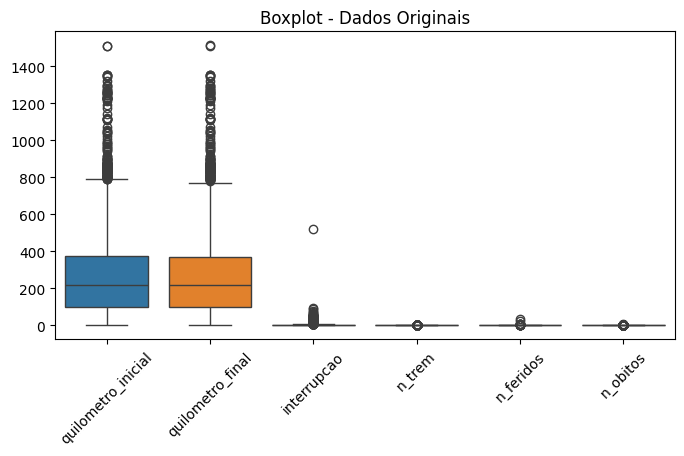


------------------------------------------------------------------------------------------


Número de linhas após remoção de outliers: 1874

------------------------------------------------------------------------------------------



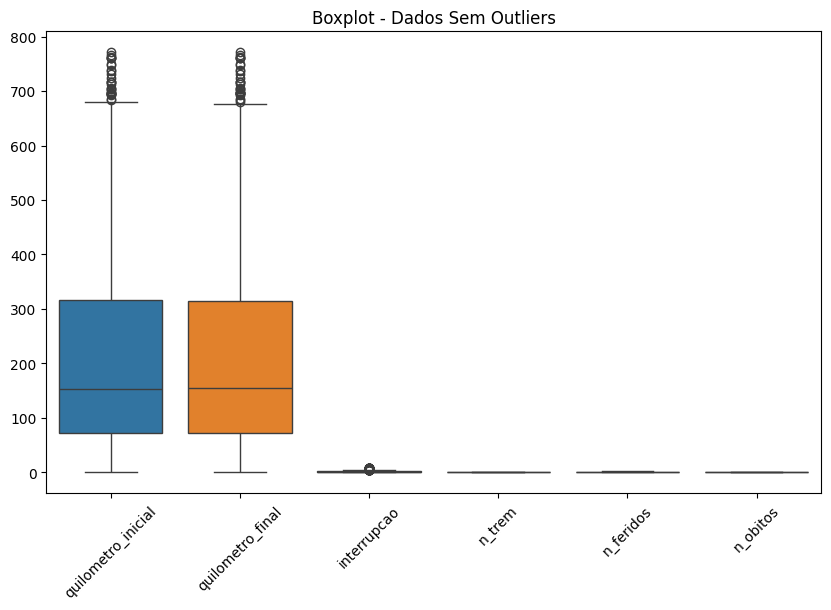

In [410]:
# Detecção e remoção de outliers (usando IQR)

## Visualização dos Outliers antes da remoção
# Gráfico de boxplot para visualização dos outliers antes da remoção
plt.figure(figsize=(8,4))
sns.boxplot(data=df[numerical_cols])
plt.title('Boxplot - Dados Originais')
plt.xticks(rotation=45)
plt.show()

print("\n" + "-"*90 + "\n")

# Detectando outliers e removendo linhas com outliers
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Filtrando as linhas que não são outliers
df_outliers_removed = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"\nNúmero de linhas após remoção de outliers: {df_outliers_removed.shape[0]}")

print("\n" + "-"*90 + "\n")

## Visualização dos Outliers após a remoção
# Gráfico de boxplot para visualização dos dados sem outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df_outliers_removed[numerical_cols])
plt.title('Boxplot - Dados Sem Outliers')
plt.xticks(rotation=45)
plt.show()

**Conversão de Tipos de Dados**
****
Foi realizada a conversão de todas as colunas do tipo object — que normalmente representam variáveis categóricas em formato textual — para o tipo category, com o intuito de otimizar o uso de memória e obter melhora no desempenho em algumas operações, como agrupamentos e Machine Learning.

****

In [411]:
# Conversão de tipos de dados
print("\nTipos de dados antes da conversão:")
print(df.dtypes)

# Convertendo variáveis categóricas para o tipo 'category' para otimizar memória
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')

# Exibindo os tipos de dados após a conversão
print("\nTipos de dados após conversão:")
print(df.dtypes)


Tipos de dados antes da conversão:
gravidade                      object
concessionaria                 object
data_ocorrencia        datetime64[ns]
hora_ocorrencia                object
uf                             object
municipio                      object
linha                          object
quilometro_inicial            float64
quilometro_final              float64
estacao_anterior               object
estacao_posterior              object
perimetro_urbano               object
causa_direta                   object
causa_contibutiva              object
natureza                       object
interrupcao                   float64
n_trem                          int64
prefixo                        object
double_stack                   object
servico_transporte             object
n_feridos                       int64
n_obitos                        int64
mercadoria                     object
equipagem                      object
outra_ferrovia                 object
pn            

**Normalização / Padronização**
****
A normalização/padronização do dataset se deu por ter variaveis em escalas diferentes (como numero de vitimas e custo do acidente), garantindo assim que todas sejam tratadas da mesma forma pelo modelo.

A padronização também equilibrou a influencia das variaveis no modelo, evitando assim que uma unica variavel com uma escala muito grande domine as outras.

Após a normalização, o código imprime um resumo estatístico das variáveis numéricas normalizadas permitindo visualizar a média de 0, desvio padrão de 1 e outras estatísticas, garantindo que a normalização foi realizada corretamente.

****

In [412]:
# Normalização/Padrão de variáveis numéricas

# Se for necessário padronizar variáveis numéricas
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Exibindo um resumo das variáveis numéricas após normalização
print("\nResumo das variáveis numéricas após normalização:")
print(df[numerical_cols].describe())


Resumo das variáveis numéricas após normalização:
       quilometro_inicial  quilometro_final   interrupcao        n_trem     n_feridos      n_obitos
count        2.973000e+03      2.973000e+03  2.973000e+03  2.973000e+03  2.973000e+03  2.973000e+03
mean        -4.779971e-18     -4.779971e-18 -3.823977e-17 -1.816389e-16  1.433991e-17  1.911989e-17
std          1.000168e+00      1.000168e+00  1.000168e+00  1.000168e+00  1.000168e+00  1.000168e+00
min         -1.100446e+00     -1.103285e+00 -3.330748e-01 -4.834250e+00 -3.601623e-01 -4.111205e-01
25%         -7.113241e-01     -7.072358e-01 -3.249989e-01  1.998044e-01 -3.601623e-01 -4.111205e-01
50%         -2.303736e-01     -2.240606e-01 -2.442395e-01  1.998044e-01 -3.601623e-01 -4.111205e-01
75%          3.871895e-01      3.767533e-01 -7.464472e-02  1.998044e-01  7.073975e-01 -4.111205e-01
max          4.897700e+00      4.948455e+00  4.174257e+01  5.233858e+00  3.486931e+01  1.293234e+01


****
****

In [413]:
# Estatísticas descritivas
# Armazena a descrição em uma variável
desc = df.describe(include='all').transpose()
# Ajusta a visualização para mostrar todas as colunas no terminal
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', 1000):
    print("Estatísticas descritivas por coluna:\n")
    print(desc)

Estatísticas descritivas por coluna:

                      count unique                                                                                           top  freq                           mean                  min                  25%                  50%                  75%                  max       std
gravidade              2973      2                                                                                           Não  1596                            NaN                  NaN                  NaN                  NaN                  NaN                  NaN       NaN
concessionaria         2973     13                                                                                           RMS   858                            NaN                  NaN                  NaN                  NaN                  NaN                  NaN       NaN
data_ocorrencia        2973    NaN                                                                                     

**Média / Desvio Padrão**
****
****

Média das variáveis numéricas:
 quilometro_inicial   -4.779971e-18
quilometro_final     -4.779971e-18
interrupcao          -3.823977e-17
n_trem               -1.816389e-16
n_feridos             1.433991e-17
n_obitos              1.911989e-17
dtype: float64

Desvio Padrão das variáveis numéricas:
 quilometro_inicial    1.000168
quilometro_final      1.000168
interrupcao           1.000168
n_trem                1.000168
n_feridos             1.000168
n_obitos              1.000168
dtype: float64


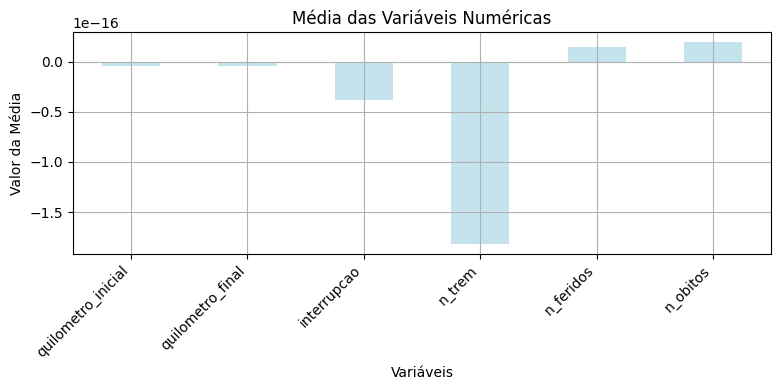


------------------------------------------------------------------------------------------------------------------------------------------------------



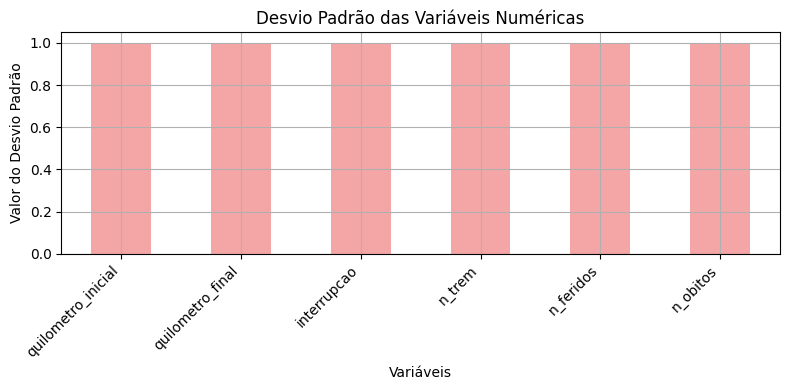

In [422]:
# Identificando as colunas numéricas
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Cálculo da média e do desvio padrão para as variáveis numéricas
media = df[numerical_cols].mean()
desvio_padrao = df[numerical_cols].std()

# Exibindo os resultados
print("Média das variáveis numéricas:\n", media)

print("\nDesvio Padrão das variáveis numéricas:\n", desvio_padrao)

# Gráfico para a média
plt.figure(figsize=(8, 4))
media.plot(kind='bar', color='lightblue', alpha=0.7)
plt.title('Média das Variáveis Numéricas')
plt.ylabel('Valor da Média')
plt.xlabel('Variáveis')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

print("\n" + "-"*150 + "\n")

# Gráfico para o desvio padrão
plt.figure(figsize=(8, 4))
desvio_padrao.plot(kind='bar', color='lightcoral', alpha=0.7)
plt.title('Desvio Padrão das Variáveis Numéricas')
plt.ylabel('Valor do Desvio Padrão')
plt.xlabel('Variáveis')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

**Matriz de Correlação**
****
****

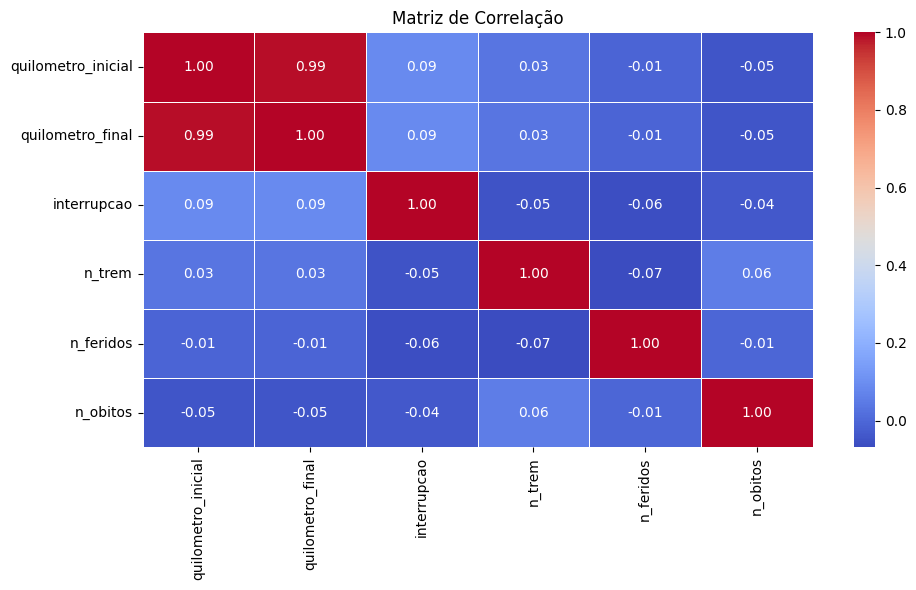

In [416]:
# Matriz de Correlação
corr_matrix = df[numerical_cols].corr()

# Visualizando a matriz de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.tight_layout()
plt.show()